In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import timeit
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score

In [2]:
x_resampled=pd.read_csv('resampled_without_encoding.csv')
x_resampled_encoding=pd.read_csv('resampled_with_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')

### Data with Resampling and without OneHotEncoding

In [3]:
X = x_resampled.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [4]:
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [5]:
for k in [3,4,5,6,7,8,9]:
    """
    loop through each value of K
    fit a model with the chosen value of K
    check for predictions
    finally print the accuracy score
    """
    model=KNeighborsClassifier(n_neighbors=k)

    start_time = timeit.default_timer()
    model.fit(train_sc,y_train)
    elapsed = timeit.default_timer() - start_time
    
    print("Time taken to fit the model in sec is ",elapsed)
    y_pred=model.predict(test_sc)
    print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
    model.get_params()
      

Time taken to fit the model in sec is  0.09587529999999589
Accuracy score: 0.8476
Time taken to fit the model in sec is  0.11707040000001712
Accuracy score: 0.8704
Time taken to fit the model in sec is  0.11278870000001007
Accuracy score: 0.8228
Time taken to fit the model in sec is  0.11515169999995578
Accuracy score: 0.8430
Time taken to fit the model in sec is  0.1166932999999517
Accuracy score: 0.8047
Time taken to fit the model in sec is  0.11036250000006476
Accuracy score: 0.8232
Time taken to fit the model in sec is  0.11178739999991194
Accuracy score: 0.7910


In [7]:
knn=KNeighborsClassifier()

parameters = {
    'n_neighbors': range(3,30,1)
}

grid_search = GridSearchCV(estimator=knn, cv=5, param_grid=parameters)

start_time = timeit.default_timer()
grid_search.fit(train_sc, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  14454.099714099999


In [8]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [9]:
grid_search.best_score_

0.8598833089659553

In [10]:
knn_final = grid_search.best_estimator_
start_time = timeit.default_timer()
knn_final.fit(train_sc, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred1 = knn_final.predict(test_sc)

Time taken to fit the model in sec is  0.11449879999781842


In [11]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred1):.4f}")

Accuracy score: 0.8704
F1 score : 0.8855
Recall score : 0.9996
Precision score : 0.7949


<AxesSubplot:>

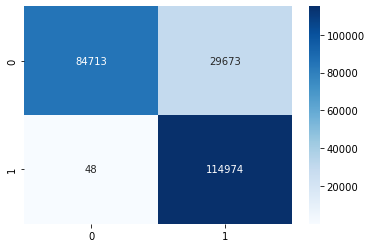

In [12]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='',cmap='Blues')

In [13]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85    114386
           1       0.79      1.00      0.89    115022

    accuracy                           0.87    229408
   macro avg       0.90      0.87      0.87    229408
weighted avg       0.90      0.87      0.87    229408



### Data with Resampling and with OneHotEncoding

In [14]:
X = x_resampled_encoding.values
Y = np.squeeze(y_resampled.values)
X_train,X_test2,y_train,y_test2=train_test_split(X,Y,test_size=0.2,random_state=10)

In [15]:
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test2)

In [19]:
knn=KNeighborsClassifier()

parameters = {
    'n_neighbors': range(3,30,1)
}

grid_search = GridSearchCV(estimator=knn, cv=5, param_grid=parameters)

start_time = timeit.default_timer()
grid_search.fit(train_sc, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  62795.81762


In [20]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [21]:
grid_search.best_score_

0.9189475483180708

In [5]:
knn_final = KNeighborsClassifier(n_neighbors=4)#grid_search.best_estimator_
start_time = timeit.default_timer()
knn_final.fit(train_sc, y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred2 = knn_final.predict(test_sc)

Time taken to fit the model in sec is  0.3150145999999836


In [6]:
print(f"Accuracy score: {accuracy_score(y_test2, y_pred2):.4f}")
print(f"F1 score : {f1_score(y_test2, y_pred2):.4f}")
print(f"Recall score : {recall_score(y_test2, y_pred2):.4f}")
print(f"Precision score : {precision_score(y_test2, y_pred2):.4f}")

Accuracy score: 0.9255
F1 score : 0.9290
Recall score : 0.9712
Precision score : 0.8902


<AxesSubplot:>

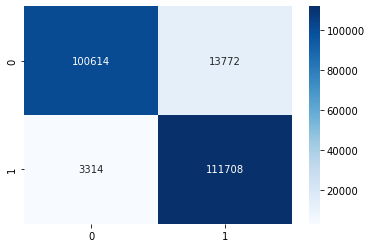

In [7]:
sns.heatmap(confusion_matrix(y_test2,y_pred2),annot=True,fmt='',cmap='Blues')

In [8]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92    114386
           1       0.89      0.97      0.93    115022

    accuracy                           0.93    229408
   macro avg       0.93      0.93      0.93    229408
weighted avg       0.93      0.93      0.93    229408



### One Hot Encoding improved the accuracy

### Performing Cross Validation

In [28]:
knn=KNeighborsClassifier(n_neighbors=4)

start_time = timeit.default_timer()
knn.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

start_time = timeit.default_timer()
#perform k fold
cv_r2_scores_rf = cross_val_score(knn, X, Y, cv=5,scoring='r2')
elapsed = timeit.default_timer() - start_time
print("Time taken to perform cv for the model in sec is ",elapsed)

print("Cv2 scores:",cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Time taken to fit the model in sec is  0.28994149999925867
Time taken to perform cv for the model in sec is  3567.5441681999946
Cv2 scores: [0.58336239 0.72679125 0.73545707 0.73332985 0.73102826]
Mean 5-Fold R Squared: 0.7019937636017449


* We see that the metrics for all folds in cross_val_score are uniform so it can be concluded that the model is able to generalise